### Датасет: данные девушек с эскорта

### Задача: построить модель регрессии, которая бы оценивала стоимость эскортницы исходя из ее характеристик

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Загружаем датасет

In [2]:
df = pd.read_csv('escort.csv')
df.head()

,Unnamed: 0,Age,Boobs,Height,Size,Metro,DateUpdate,Weight,Price_USD
0,0,27.0,3.0,173.0,46.0,"Алтуфьево, Медведково, Отрадное",07.09.2010,57.0,22.0
1,1,27.0,3.0,168.0,46.0,Кунцевская,05.07.2010,65.0,30.0
2,2,25.0,4.0,165.0,52.0,"Кутузовская, Студенческая, Киевская",24.10.2016,52.0,223.0
3,3,21.0,2.0,170.0,42.0,Тимирязевская,25.10.2006,60.0,22.0
4,4,35.0,4.0,180.0,46.0,Проспект Мира,27.12.2010,70.0,52.0


### Убираем ненужные признаки

In [3]:
df = df.drop(columns=['DateUpdate', 'Unnamed: 0'])
df.dropna(subset=['Metro'], inplace=True)
df.head()

,Age,Boobs,Height,Size,Metro,Weight,Price_USD
0,27.0,3.0,173.0,46.0,"Алтуфьево, Медведково, Отрадное",57.0,22.0
1,27.0,3.0,168.0,46.0,Кунцевская,65.0,30.0
2,25.0,4.0,165.0,52.0,"Кутузовская, Студенческая, Киевская",52.0,223.0
3,21.0,2.0,170.0,42.0,Тимирязевская,60.0,22.0
4,35.0,4.0,180.0,46.0,Проспект Мира,70.0,52.0


### Изучаем корреляцию между признаками

<AxesSubplot:>

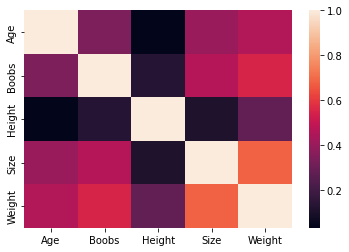

In [4]:
corr_matrix = df.iloc[:,[0,1,2,3,5]].corr()
sns.heatmap(corr_matrix)

### Визуализируем распределение цен эскортниц по парам признаков

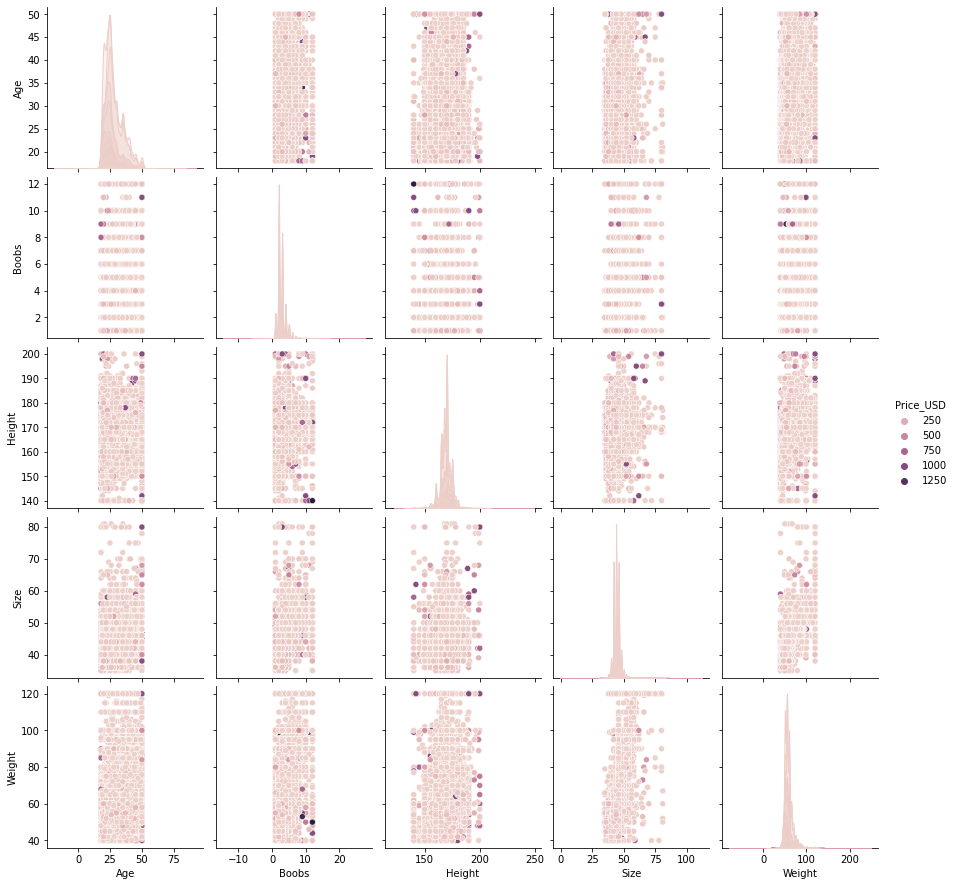

In [5]:
sns.pairplot(df, vars=df.columns[[0,1,2,3,5]], hue='Price_USD')

#### Видим, что графики нерепрезентативны, вследствие наличия слишком больших значений Price_USD при их небольшом количестве. Убедимся в этом на гистограмме

(array([2.1207e+04, 6.5530e+04, 5.6553e+04, 1.1490e+03, 1.7729e+04,
        8.1680e+03, 4.4750e+03, 4.0450e+03, 2.0400e+02, 5.6980e+03,
        6.2000e+01, 7.9400e+02, 6.8000e+01, 8.4000e+01, 1.6060e+03,
        1.4200e+02, 2.8000e+01, 3.2000e+01, 6.0000e+00, 5.5100e+02,
        5.0000e+00, 5.0000e+00, 3.0000e+00, 2.0000e+00, 1.1300e+02,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 1.5400e+02,
        0.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00, 1.9000e+01,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 3.2000e+01,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.2000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.3000e+01,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.6000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.1500e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

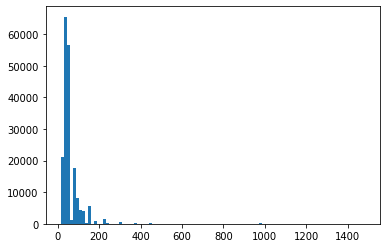

In [6]:
plt.hist(df.Price_USD, bins=100)

In [5]:
print(f'Среднее: {df.Price_USD.mean()}\nОтклонение: {df.Price_USD.std()}')

Среднее: 55.68028191404801
Отклонение: 50.55164615552695


#### Избавимся от "выбросов" значений по целевому признаку

In [6]:
df = df[df.Price_USD <= 250]

KeyboardInterrupt: 

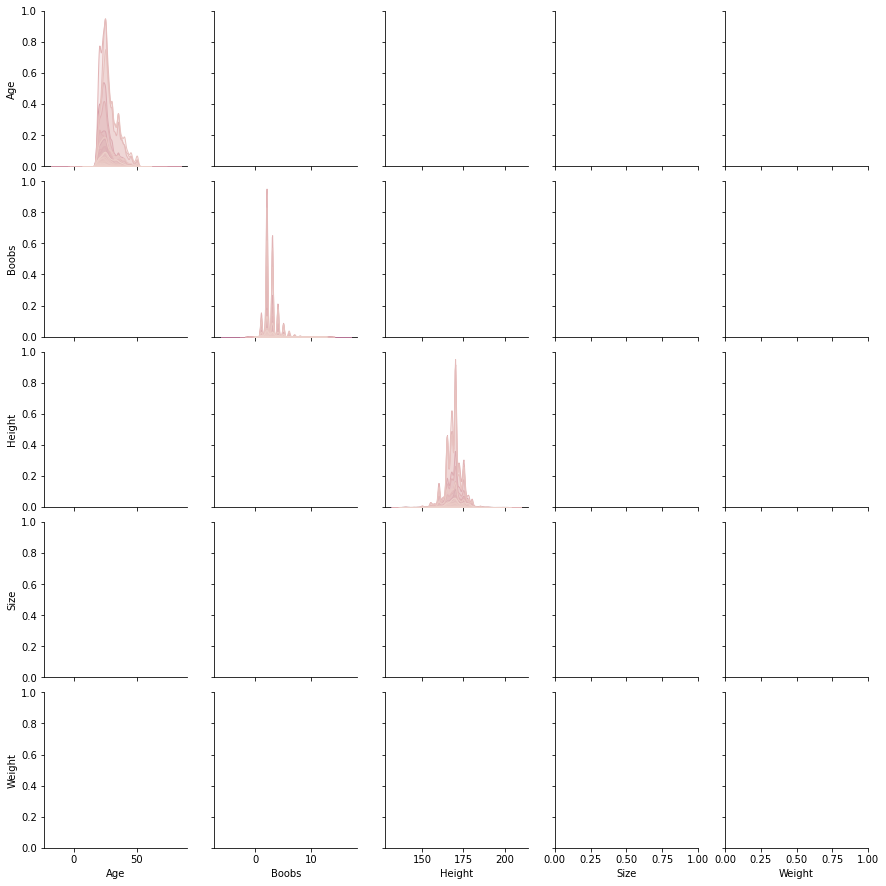

In [8]:
sns.pairplot(df, vars=df.columns[[0,1,2,3,5]], hue='Price_USD')

### Разбираемся с метро

In [7]:
metros = []

In [8]:
for whore in np.array(df.Metro, dtype=str):
    for station in whore.split(',\xa0'):
        metros.append(station)

In [9]:
metros = np.array(metros)

In [10]:
len(np.unique(metros))

265

In [11]:
all_metros = np.unique(metros)
print(all_metros)

['Авиамоторная' 'Автово' 'Автозаводская' 'Адмиралтейская' 'Академическая'
 'Александровский сад' 'Алексеевская' 'Алма-Атинская' 'Алтуфьево'
 'Андроновка' 'Аннино' 'Арбатская' 'Аэропорт' 'Бабушкинская'
 'Багратионовская' 'Балтийская' 'Баррикадная' 'Бауманская' 'Беговая'
 'Белокаменная' 'Белорусская' 'Беляево' 'Бибирево' 'Библиотека им.Ленина'
 'Битцевский парк' 'Борисово' 'Боровицкая' 'Ботанический сад'
 'Братиславская' 'Бульвар Адмирала Ушакова' 'Бульвар Дмитрия Донского'
 'Бульвар Рокоссовского' 'Бунинская Аллея' 'Бутырская' 'ВДНХ' 'Варшавская'
 'Василеостровская' 'Верхние Котлы' 'Верхние Лихоборы' 'Владимирская'
 'Владыкино' 'Водный стадион' 'Войковская' 'Волгоградский проспект'
 'Волжская' 'Волоколамская' 'Воробьевы горы' 'Выборгская' 'Выставочная'
 'Выхино' 'Горьковская' 'Гостиный двор' 'Гражданский пр.' 'Девяткино'
 'Деловой центр' 'Деловой центр (МЦК)' 'Динамо' 'Дмитровская'
 'Добрынинская' 'Домодедовская' 'Достоевская' 'Дубровка' 'Елизаровская'
 'Жулебино' 'ЗИЛ' 'Звездная' 'Зорг

In [12]:
df.Metro = df.Metro.map(lambda cell: cell.split(',\xa0'))
    
df.head()

,Age,Boobs,Height,Size,Metro,Weight,Price_USD
0,27.0,3.0,173.0,46.0,"[Алтуфьево, Медведково, Отрадное]",57.0,22.0
1,27.0,3.0,168.0,46.0,[Кунцевская],65.0,30.0
2,25.0,4.0,165.0,52.0,"[Кутузовская, Студенческая, Киевская]",52.0,223.0
3,21.0,2.0,170.0,42.0,[Тимирязевская],60.0,22.0
4,35.0,4.0,180.0,46.0,[Проспект Мира],70.0,52.0


In [13]:
station_data = np.zeros((len(df), len(all_metros)), dtype=bool)

In [14]:
for row in range(len(df)):
    for s in df.iat[row, 4]:
        station_data[row, np.where(all_metros == s)] = 1

In [15]:
i = 0
for s in all_metros:
    df[s] = station_data[:, i]
    i +=1

/tmp/ipykernel_602/3638949871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[s] = station_data[:, i]


In [16]:
df = df.drop('Metro', axis=1)
df.head()

,Age,Boobs,Height,Size,Weight,Price_USD,Авиамоторная,Автово,Автозаводская,Адмиралтейская,...,Шелепиха,Шипиловская,Шоссе энтузиастов,Щелковская,Щукинская,Электрозаводская,Электросила,Юго-Западная,Южная,Ясенево
0,27.0,3.0,173.0,46.0,57.0,22.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,27.0,3.0,168.0,46.0,65.0,30.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,25.0,4.0,165.0,52.0,52.0,223.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,21.0,2.0,170.0,42.0,60.0,22.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,35.0,4.0,180.0,46.0,70.0,52.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
df.columns = df.columns.astype(str)

#### Разбиваем датасет на train/test

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop(['Price_USD'], axis=1)
y = df['Price_USD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Линейная регрессия

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
linreg = LinearRegression() 
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)
d = {'y_test': y_test, 'linreg': linreg_pred}
model_results = pd.DataFrame(data = d)
model_results

,y_test,linreg
28327,22.0,38.107930
160383,59.0,48.423706
65591,37.0,43.561669
198425,37.0,61.980172
172557,52.0,52.910225
...,...,...
137880,74.0,45.060691
72651,59.0,61.323099
70662,74.0,57.655762
18286,27.0,40.952805


#### Посчитаем метрику MSE для линейной регрессии

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
mean_squared_error(y_test, linreg_pred)

942.2819977204756

### Gradient Boosting Regression

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
params = {'n_estimators':200,
          'max_depth':12,
          'criterion':'friedman_mse',
          'learning_rate':0.03
          }
GBR = GradientBoostingRegressor(**params)
GBR.fit(X_train,y_train)
GBR_pred = GBR.predict(X_test)
model_results['GBR'] = GBR_pred

In [29]:
model_results

,y_test,linreg,GBR
28327,22.0,38.107930,40.911408
160383,59.0,48.423706,55.057489
65591,37.0,43.561669,44.463403
198425,37.0,61.980172,57.666084
172557,52.0,52.910225,51.028211
...,...,...,...
137880,74.0,45.060691,49.173885
72651,59.0,61.323099,54.669389
70662,74.0,57.655762,46.875083
18286,27.0,40.952805,41.974927


#### Посчитаем MSE для GBR

In [30]:
mean_squared_error(y_test, GBR_pred)

847.1790254265744

#### Применим GridSearch для оптимизации параметров

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
grid_GBR_pred = grid_GBR.predict(X_test)
model_results['Grid_GBR'] = grid_GBR_pred
model_results

,y_test,linreg,GBR,Grid_GBR
28327,22.0,38.107930,40.911408,37.004413
160383,59.0,48.423706,55.057489,59.599574
65591,37.0,43.561669,44.463403,42.441938
198425,37.0,61.980172,57.666084,52.321506
172557,52.0,52.910225,51.028211,50.056636
...,...,...,...,...
137880,74.0,45.060691,49.173885,48.903463
72651,59.0,61.323099,54.669389,55.373306
70662,74.0,57.655762,46.875083,47.824458
18286,27.0,40.952805,41.974927,37.163111


In [33]:
mean_squared_error(y_test, grid_GBR_pred)

800.9098597085798

### Random Forest Regression

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
params = {'n_estimators':200,
          'max_depth':12,
          'criterion':'friedman_mse',
          'n_jobs':-1,
          }
RFR = RandomForestRegressor(**params)
RFR.fit(X_train,y_train)
RFR_pred = RFR.predict(X_test)
model_results['RFR'] = RFR_pred

In [36]:
model_results

,y_test,linreg,GBR,Grid_GBR,RFR
28327,22.0,38.107930,40.911408,37.004413,42.670239
160383,59.0,48.423706,55.057489,59.599574,56.697295
65591,37.0,43.561669,44.463403,42.441938,44.912564
198425,37.0,61.980172,57.666084,52.321506,54.119577
172557,52.0,52.910225,51.028211,50.056636,50.980635
...,...,...,...,...,...
137880,74.0,45.060691,49.173885,48.903463,50.844483
72651,59.0,61.323099,54.669389,55.373306,48.687052
70662,74.0,57.655762,46.875083,47.824458,47.669289
18286,27.0,40.952805,41.974927,37.163111,44.140332


In [37]:
mean_squared_error(y_test, RFR_pred)

924.4525263138455

#### + GridSearch

In [38]:
# parameters = {
#     'n_estimators' : [100,500,1000,1500],
#     'max_depth'    : [4,6,8,10]
# }

# grid_RFR = GridSearchCV(estimator=RFR, param_grid = parameters, cv = 2, n_jobs=-1)
# grid_RFR.fit(X_train, y_train)
# grid_RFR_pred = grid_RFR.predict(X_test)
# model_results['Grid_RFR'] = grid_RFR_pred
# model_results

In [39]:
# mean_squared_error(y_test, grid_RFR_pred)

In [40]:
# print(X_test)
# grid_RFR.predict(np.array([20, 3, 170, 42, 50]).reshape(1, -1))

### Оценим важность признаков

In [41]:
from sklearn.ensemble import ExtraTreesClassifier

X_ETC = X.values
Y_ETC = y.values

# feature extraction
model = ExtraTreesClassifier()
model.fit(X_ETC, Y_ETC)

print(model.feature_importances_)

[1.75201762e-01 9.28722700e-02 1.88321489e-01 9.28506480e-02
 1.91732768e-01 1.71556092e-03 1.64601916e-05 2.06951453e-03
 1.59616259e-05 2.27545710e-03 5.40556321e-04 2.35050268e-03
 5.15632665e-04 2.23806666e-03 6.50028582e-05 1.08739656e-03
 1.55462768e-03 2.24987577e-03 1.83300256e-03 1.11399301e-03
 1.20364380e-04 2.24882353e-03 2.31130784e-03 2.31381292e-03
 7.06679495e-06 1.85064388e-03 1.91622460e-03 1.26051409e-03
 6.65634370e-04 1.02555144e-04 7.42462382e-04 3.54699390e-04
 1.29167594e-03 1.10749462e-03 7.13727530e-04 9.75094382e-04
 6.01695819e-04 6.09816797e-04 3.89408579e-05 2.68674539e-03
 2.06991895e-03 6.06616279e-06 5.89256221e-05 1.93967517e-05
 2.82141828e-05 1.16470217e-03 1.59340796e-03 2.13630092e-03
 1.76852347e-03 1.25359136e-03 8.12427092e-04 1.09521693e-03
 2.24535317e-06 1.31924599e-03 2.16589881e-03 2.93762908e-05
 3.74645698e-05 6.10438421e-06 3.08630097e-06 8.55862839e-04
 1.47168049e-04 3.32640978e-03 1.58939183e-03 1.58253071e-03
 1.69964596e-03 7.661079

In [42]:
feature_importances = model.feature_importances_

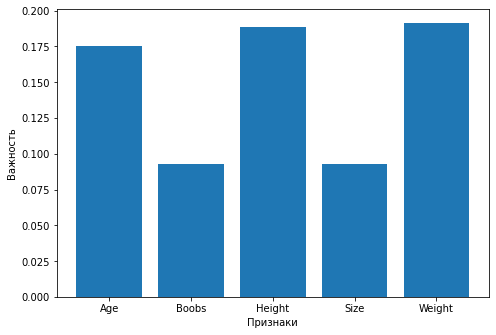

In [43]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(df.columns[:5], feature_importances[:5])
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.show()

#### Вывод: размер не имеет значение! (но его имеет рост, вес и возраст)

#### Дополнительно:

In [25]:
test = np.zeros(270, dtype=int)

test[0] = int(input("Возраст:"))
test[1] = int(input("Размер груди:"))
test[2] = int(input("Рост:"))
test[3] = int(input("Размер:"))
test[4] = int(input("Вес:"))

print(f'Ваша почасовая оплата: {int(linreg.predict(test.reshape(1, -1))[0])}$')

Возраст: 20
Размер груди: 1
Рост: 176
Размер: 48
Вес: 73


Ваша почасовая оплата: 35$


/opt/conda/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
